In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma.extras import unique
%matplotlib inline

In [37]:
df = pd.read_csv("18-concrete_data.csv")

In [38]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [39]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [41]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [42]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

<Axes: >

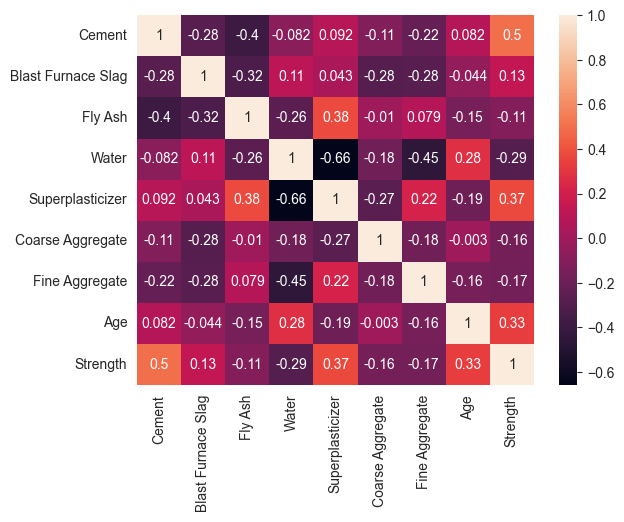

In [43]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Cement', ylabel='Strength'>

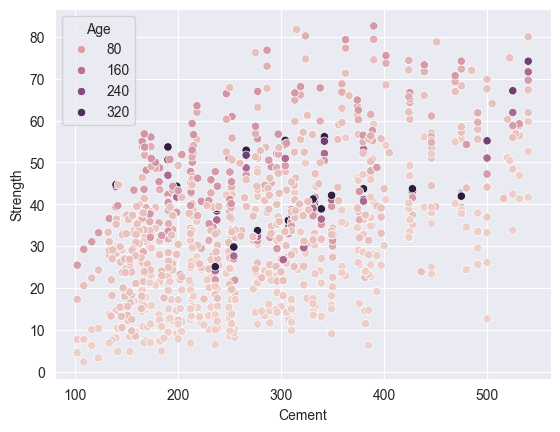

In [44]:
sns.scatterplot(data=df, x="Cement", y="Strength", hue="Age")

<Axes: xlabel='Water', ylabel='Strength'>

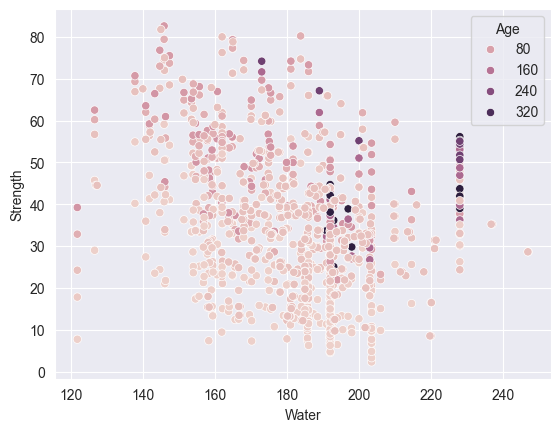

In [45]:
sns.scatterplot(data=df, x="Water", y="Strength", hue="Age")

In [46]:
X = df.drop("Strength", axis=1)
y = df["Strength"]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
#first weak learner
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [63]:
y2 = y_train - tree_reg1.predict(X_train)

In [64]:
y2[:5]

919   -15.044359
641    -2.967000
535     2.098039
835   -10.123407
583    -2.334359
Name: Strength, dtype: float64

In [65]:
#second weak learner
tree_reg2 = DecisionTreeRegressor(max_depth=3)
tree_reg2.fit(X_train, y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [66]:
y3 = y2 - tree_reg2.predict(X_train)

In [67]:
y3[:5]

919    -9.343032
641     2.734327
535     7.799366
835   -12.639772
583     1.229223
Name: Strength, dtype: float64

In [68]:
#third weak learner
tree_reg3 = DecisionTreeRegressor(max_depth=3)
tree_reg3.fit(X_train, y3)
y4 = y3 - tree_reg3.predict(X_train)
y4[:5]

919    -6.130025
641     1.798780
535    11.012373
835    -9.426766
583     0.128461
Name: Strength, dtype: float64

In [69]:
y_pred = sum(tree.predict(X_test)for tree in (tree_reg1, tree_reg2, tree_reg3))

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7550658843413094

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
gbr = GradientBoostingRegressor(n_estimators=3,max_depth=3,learning_rate=0.1)
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,3
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [75]:
y_pred2 = gbr.predict(X_test)
r2_score(y_test, y_pred2)

0.31671418229216797

In [76]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred3 = gbr.predict(X_test)
r2_score(y_test, y_pred3)

0.924730619815904

In [78]:
#hyperparameter tuning
params ={
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'learning_rate': [0.1,0.2,0.3],
    'loss': ['squared_error',"absolute_error",'huber',"quantile"]
}

In [79]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(GradientBoostingRegressor(), params)
rscv.fit(X_train, y_train)
y_pred4 = rscv.predict(X_test)
r2_score(y_test, y_pred4)

0.9512467219025804

In [80]:
rscv.best_params_

{'n_estimators': 300, 'max_depth': 4, 'loss': 'huber', 'learning_rate': 0.1}